In [1]:
import torch
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_data(file_path: str) -> tuple:
    """데이터를 불러오는 함수
    Args:
        file_path (str): 데이터 파일의 경로
    Returns:
        X_train, y_train, X_test, y_test
    """
    data = pandas.read_csv(file_path)
    X = data.drop('G(mg/dL)', axis=1).values
    y = data['G(mg/dL)'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return torch.tensor(X_train, dtype=torch.float32), \
        torch.tensor(y_train, dtype=torch.float32), \
        torch.tensor(X_test, dtype=torch.float32), \
        torch.tensor(y_test, dtype=torch.float32)


# 데이터 불러오기
data_L1 = load_data('data/data_L1.csv')
data_L2 = load_data('data/data_L2.csv')
data_L3 = load_data('data/data_L3.csv')

In [2]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

batch_size = 1
num_epochs = 3
learning_rate = 0.001

train_loader_L1 = DataLoader(TensorDataset(data_L1[0].unsqueeze(1), data_L1[1]), batch_size=batch_size, shuffle=True)
train_loader_L2 = DataLoader(TensorDataset(data_L2[0].unsqueeze(1), data_L2[1]), batch_size=batch_size, shuffle=True)
train_loader_L3 = DataLoader(TensorDataset(data_L3[0].unsqueeze(1), data_L3[1]), batch_size=batch_size, shuffle=True)

In [3]:
RF_L1=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
GBM_L1 = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=0)

RF_L2=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
GBM_L2 = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=0)

RF_L3=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
GBM_L3 = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=0)

# XGB= XGBClassifier(n_estimators=200, max_depth=4,n_jobs=-1)

In [4]:
for epoch in tqdm(range(num_epochs), desc=f'Train {str}'):
    RF_L1.fit(data_L1[0], data_L1[1])
    GBM_L1.fit(data_L1[0], data_L1[1])
    
    RF_L2.fit(data_L2[0], data_L2[1])
    GBM_L2.fit(data_L2[0], data_L2[1])
    
    RF_L3.fit(data_L3[0], data_L3[1])
    GBM_L3.fit(data_L3[0], data_L3[1])
# XGB.fit(data_L1[0], data_L1[1], eval_metric=["logloss"], verbose=True)

Train <class 'str'>: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.37s/it]


In [5]:
print(RF_L1.score(data_L1[2], data_L1[3]))
print(RF_L2.score(data_L2[2], data_L2[3]))
print(RF_L3.score(data_L3[2], data_L3[3]))

print(GBM_L1.score(data_L1[2],data_L1[3]))
print(GBM_L2.score(data_L2[2],data_L2[3]))
print(GBM_L3.score(data_L3[2],data_L3[3]))

0.9117647058823529
0.8970588235294118
0.9338235294117647
0.9338235294117647
0.9338235294117647
0.9117647058823529


In [6]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score

def model_infer(model, loder) -> tuple:
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model.to(device)
#     model.eval()
    
    y_pred = []
    y_true = []
    
#     with torch.no_grad():
    for X, y in loder:
#         X = X.to(device)
#         y = y.to(device)
        y_hat = model.predict(X.squeeze(0).tolist()) # model(X)
        y_hat = torch.Tensor(y_hat)
        y_pred.append(y_hat.cpu().numpy())
        y_true.append(y.cpu().numpy())
        
    y_pred = numpy.concatenate(y_pred)
    y_true = numpy.concatenate(y_true)
    rms = numpy.sqrt(mean_squared_error(y_true, y_pred.squeeze()))
    r2 = r2_score(y_true, y_pred.squeeze())
    return y_pred, y_true, rms, r2

In [7]:
count = 0
for X, y in train_loader_L2:
    result1 = RF_L2.predict(X.squeeze(0).tolist())
    result2 = GBM_L3.predict(X.squeeze(0).tolist())
    print(result1," : ", result2, " : ", y)
    count += 1
    if count > 5:
        break

[200.]  :  [400.]  :  tensor([200.])
[100.]  :  [200.]  :  tensor([100.])
[50.]  :  [400.]  :  tensor([50.])
[250.]  :  [100.]  :  tensor([250.])
[250.]  :  [50.]  :  tensor([250.])
[50.]  :  [350.]  :  tensor([50.])


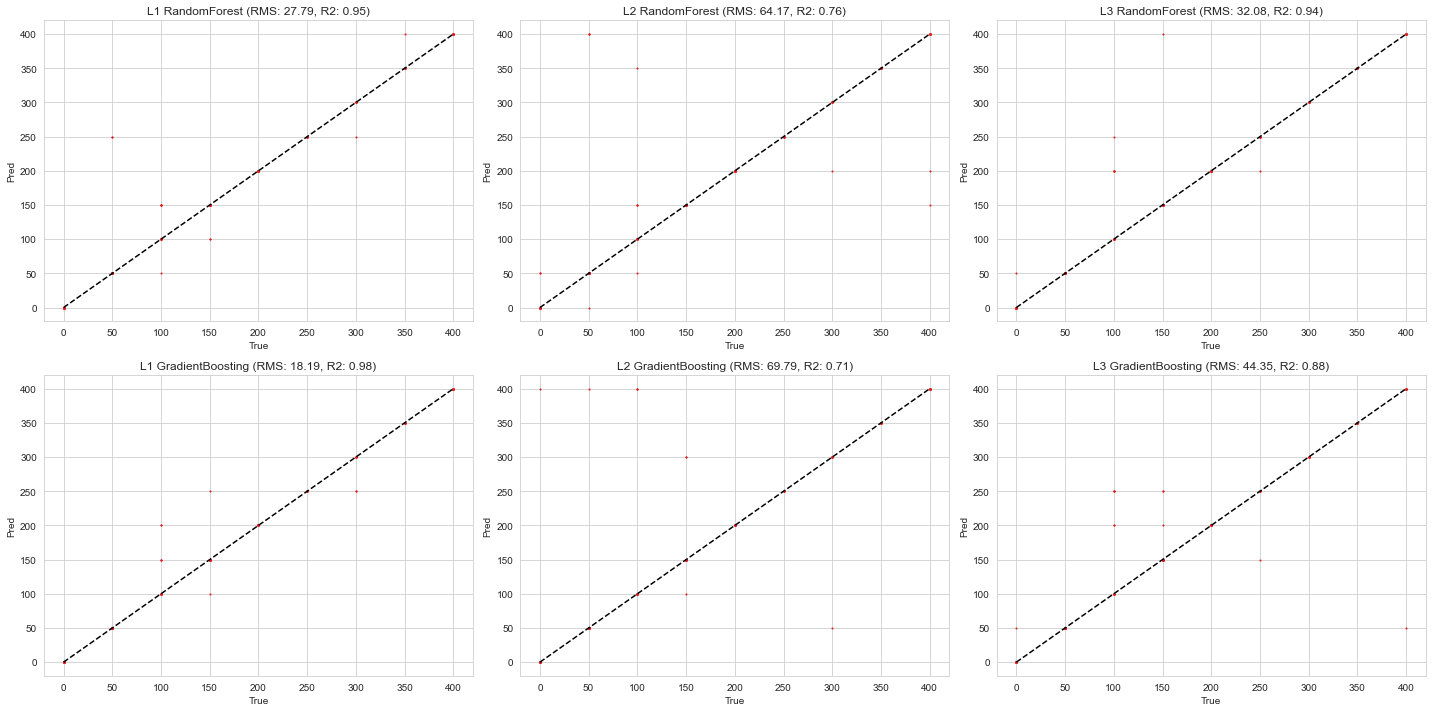

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set1')

test_loader_L1 = DataLoader(TensorDataset(data_L1[2].unsqueeze(1), data_L1[3]), batch_size=batch_size, shuffle=True)
test_loader_L2 = DataLoader(TensorDataset(data_L2[2].unsqueeze(1), data_L2[3]), batch_size=batch_size, shuffle=True)
test_loader_L3 = DataLoader(TensorDataset(data_L3[2].unsqueeze(1), data_L3[3]), batch_size=batch_size, shuffle=True)

fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(20, 10))
y_pred, y_true, rms, r2 = model_infer(RF_L1, test_loader_L1)
ax1[0].scatter(y_true, y_pred, s=1, label='RandomForest')
ax1[0].plot([0, 400], [0, 400], 'k--')
ax1[0].set_xlabel('True')
ax1[0].set_ylabel('Pred')
ax1[0].set_title(f'L1 RandomForest (RMS: {rms:.2f}, R2: {r2:.2f})')

y_pred, y_true, rms, r2 = model_infer(RF_L2, test_loader_L2)
ax1[1].scatter(y_true, y_pred, s=1, label='RandomForest')
ax1[1].plot([0, 400], [0, 400], 'k--')
ax1[1].set_xlabel('True')
ax1[1].set_ylabel('Pred')
ax1[1].set_title(f'L2 RandomForest (RMS: {rms:.2f}, R2: {r2:.2f})')

y_pred, y_true, rms, r2 = model_infer(RF_L3, test_loader_L3)
ax1[2].scatter(y_true, y_pred, s=1, label='RandomForest')
ax1[2].plot([0, 400], [0, 400], 'k--')
ax1[2].set_xlabel('True')
ax1[2].set_ylabel('Pred')
ax1[2].set_title(f'L3 RandomForest (RMS: {rms:.2f}, R2: {r2:.2f})')

y_pred, y_true, rms, r2 = model_infer(GBM_L1, test_loader_L1)
ax2[0].scatter(y_true, y_pred, s=1, label='GradientBoosting')
ax2[0].plot([0, 400], [0, 400], 'k--')
ax2[0].set_xlabel('True')
ax2[0].set_ylabel('Pred')
ax2[0].set_title(f'L1 GradientBoosting (RMS: {rms:.2f}, R2: {r2:.2f})')

y_pred, y_true, rms, r2 = model_infer(GBM_L2, test_loader_L2)
ax2[1].scatter(y_true, y_pred, s=1, label='GradientBoosting')
ax2[1].plot([0, 400], [0, 400], 'k--')
ax2[1].set_xlabel('True')
ax2[1].set_ylabel('Pred')
ax2[1].set_title(f'L2 GradientBoosting (RMS: {rms:.2f}, R2: {r2:.2f})')

y_pred, y_true, rms, r2 = model_infer(GBM_L3, test_loader_L3)
ax2[2].scatter(y_true, y_pred, s=1, label='GradientBoosting')
ax2[2].plot([0, 400], [0, 400], 'k--')
ax2[2].set_xlabel('True')
ax2[2].set_ylabel('Pred')
ax2[2].set_title(f'L3 GradientBoosting (RMS: {rms:.2f}, R2: {r2:.2f})')

plt.tight_layout()
plt.show()

In [9]:
def load_origin(file_path: str) -> tuple:
    """데이터를 불러오는 함수
    Args:
        file_path (str): 데이터 파일의 경로
    Returns:
        X_train, y_train, X_test, y_test
    """
    data = pandas.read_csv(file_path)
    X = data.drop('G(mg/dL)', axis=1).values
    y = data['G(mg/dL)'].values

    scaler = StandardScaler()
    X_data = scaler.fit_transform(X)
    
    return data, torch.tensor(X_data, dtype=torch.float32), \
        torch.tensor(y, dtype=torch.float32)

In [10]:
def model_infer_data(model, loder) -> tuple:
    y_pred = []
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model.to(device)
#     model.eval()
#     with torch.no_grad():
    for X, y in loder:
#         X = X.to(device)
#         y = y.to(device)
        y_hat = model.predict(X.squeeze(0).tolist()) # model(X)
        y_hat = torch.Tensor(y_hat)
        y_pred.append(y_hat.cpu().numpy())
        
    y_pred = numpy.concatenate(y_pred).squeeze().tolist()
    return y_pred

In [11]:
origin1, dataX1, dataY1 = load_origin('data/data_L1.csv')
origin2, dataX2, dataY2 = load_origin('data/data_L2.csv')
origin3, dataX3, dataY3 = load_origin('data/data_L3.csv')
loader1 = DataLoader(TensorDataset(dataX1.unsqueeze(1), dataY1), batch_size=1, shuffle=False)
loader2 = DataLoader(TensorDataset(dataX2.unsqueeze(1), dataY2), batch_size=1, shuffle=False)
loader3 = DataLoader(TensorDataset(dataX3.unsqueeze(1), dataY3), batch_size=1, shuffle=False)

y_pred_RFL1 = model_infer_data(RF_L1, loader1)
y_pred_RFL2 = model_infer_data(RF_L2, loader2)
y_pred_RFL3 = model_infer_data(RF_L3, loader3)

y_pred_GBML1 = model_infer_data(GBM_L1, loader1)
y_pred_GBML2 = model_infer_data(GBM_L2, loader2)
y_pred_GBML3 = model_infer_data(GBM_L3, loader3)

df1 = pandas.DataFrame(origin1, columns=["G(mg/dL)","LD Temp","LD123_Bias_Av","mPD_dS","T-rPD_dS","R-rPD_dS"])
cols = list(df1.columns)
cols = cols[1:] + cols[:1]
df1 = df1[cols]
df1['G RF(mg/dL)'] = y_pred_RFL1
df1['G GB(mg/dL)'] = y_pred_GBML1

df2 = pandas.DataFrame(origin2, columns=["G(mg/dL)","LD Temp","LD123_Bias_Av","mPD_dS","T-rPD_dS","R-rPD_dS"])
cols = list(df2.columns)
cols = cols[1:] + cols[:1]
df2 = df2[cols]
df2['G RF(mg/dL)'] = y_pred_RFL2
df2['G GB(mg/dL)'] = y_pred_GBML2

df3 = pandas.DataFrame(origin3, columns=["G(mg/dL)","LD Temp","LD123_Bias_Av","mPD_dS","T-rPD_dS","R-rPD_dS"])
cols = list(df3.columns)
cols = cols[1:] + cols[:1]
df3 = df3[cols]
df3['G RF(mg/dL)'] = y_pred_RFL3
df3['G GB(mg/dL)'] = y_pred_GBML3


df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)
df3 = df3.sample(frac=1)

In [12]:
df1.head()

,LD Temp,LD123_Bias_Av,mPD_dS,T-rPD_dS,R-rPD_dS,G(mg/dL),G RF(mg/dL),G GB(mg/dL)
375,25.249,13.250,550.435860,1777.962189,444.218717,200,200.0,200.0
105,25.249,13.200,552.395661,1773.961403,457.303354,50,50.0,50.0
330,25.302,13.233,549.165837,1774.209297,445.382269,200,200.0,200.0
205,25.249,13.217,549.132475,1776.251749,466.598628,100,100.0,100.0
320,25.302,13.200,554.579597,1787.322609,451.128192,200,200.0,200.0


In [13]:
df2.head()

,LD Temp,LD123_Bias_Av,mPD_dS,T-rPD_dS,R-rPD_dS,G(mg/dL),G RF(mg/dL),G GB(mg/dL)
97,25.249,15.2,557.931801,602.221180,951.094910,50,50.0,50.0
394,25.302,15.2,563.183433,608.855624,884.743469,250,250.0,250.0
560,25.302,15.1,558.237008,601.429619,1003.643098,350,350.0,0.0
600,25.249,15.2,555.337788,613.326840,1011.511032,400,400.0,400.0
176,25.249,15.2,557.469269,602.287925,884.470131,100,50.0,100.0


In [14]:
df3.head()

,LD Temp,LD123_Bias_Av,mPD_dS,T-rPD_dS,R-rPD_dS,G(mg/dL),G RF(mg/dL),G GB(mg/dL)
387,25.355,23.8,326.805321,404.879089,591.263237,250,250.0,250.0
526,25.302,23.8,320.397219,418.841779,619.028517,300,300.0,300.0
299,25.355,23.8,327.406136,424.191238,599.345764,150,150.0,200.0
497,25.302,23.8,322.175171,416.871697,604.171463,300,300.0,300.0
514,25.355,23.8,324.379809,420.729401,584.185255,300,300.0,50.0
